## Calgary Crime Data Analysis and Neural Network Prediction

 The aim of this project is to use the Crime and Disorder Data provided by the City of
 Calgary's data website to analyze the data and predict the number of crimes that will
 occur in the future. The data is from 2018 to 2024 and contains the number of crimes
 that occurred in Calgary for each month. After throughly analyzing the data, I will be
 building a neural network model and optimizing it to predict the number of crimes that
 will occur in the future

## Strategy

 1. Loading the data and understanding the data
 2. Data Preprocessing - cleaing the data and preparing it for analysis
 3. Exploratory Data Analysis - Analyzing the data to understand the trends and patterns
 4. Building a Neural Network Model
 5. Optimizing the model
 6. Training the model
 7. Predicting the number of crimes that will occur in the future

In [3]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
#Loading Dataset

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tcashion/calgary-crime-statistics")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Chethan Vakiti\.cache\kagglehub\datasets\tcashion\calgary-crime-statistics\versions\1


In [8]:
import os

In [9]:
os.listdir(r"C:\Users\Chethan Vakiti\.cache\kagglehub\datasets\tcashion\calgary-crime-statistics\versions\1")

['Community_Crime_Statistics_20240102.csv']

In [10]:
data = pd.read_csv(r"C:\Users\Chethan Vakiti\.cache\kagglehub\datasets\tcashion\calgary-crime-statistics\versions\1\Community_Crime_Statistics_20240102.csv")

In [11]:
data.head()

,Sector,Community Name,Category,Crime Count,Resident Count,Date,Year,Month,ID,Community Center Point
0,NORTHWEST,01B,Assault (Non-domestic),1,0.0,2022/11,2022,NOV,2022-NOV-01B-Assault (Non-domestic),POINT (-114.24261426059833 51.102826007628536)
1,NORTHWEST,01B,Break & Enter - Commercial,1,0.0,2019/06,2019,JUN,2019-JUN-01B-Break & Enter - Commercial,POINT (-114.24261426059833 51.102826007628536)
2,NORTHWEST,01B,Break & Enter - Commercial,1,0.0,2019/08,2019,AUG,2019-AUG-01B-Break & Enter - Commercial,POINT (-114.24261426059833 51.102826007628536)
3,NORTHWEST,01B,Break & Enter - Commercial,2,0.0,2020/03,2020,MAR,2020-MAR-01B-Break & Enter - Commercial,POINT (-114.24261426059833 51.102826007628536)
4,NORTHWEST,01B,Break & Enter - Commercial,2,0.0,2020/07,2020,JUL,2020-JUL-01B-Break & Enter - Commercial,POINT (-114.24261426059833 51.102826007628536)


In [12]:
data.shape

(66349, 10)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66349 entries, 0 to 66348
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sector                  66319 non-null  object 
 1   Community Name          66349 non-null  object 
 2   Category                66349 non-null  object 
 3   Crime Count             66349 non-null  int64  
 4   Resident Count          66282 non-null  float64
 5   Date                    66349 non-null  object 
 6   Year                    66349 non-null  int64  
 7   Month                   66349 non-null  object 
 8   ID                      66349 non-null  object 
 9   Community Center Point  66319 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 5.1+ MB


In [21]:
data["Sector"].unique()

array(['NORTHWEST', 'NORTH', 'NORTHEAST', 'WEST', 'EAST', nan,
       'SOUTHEAST', 'SOUTH', 'CENTRE'], dtype=object)

In [23]:
# Dropping these columns ["Sector","Resident Count","Date","ID","Community Center Point"], because they not useful in EDA

In [25]:
data.drop(["Sector","Resident Count","Date","ID","Community Center Point"], axis=1, inplace=True)

In [27]:
data.head()

,Community Name,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,NOV
1,01B,Break & Enter - Commercial,1,2019,JUN
2,01B,Break & Enter - Commercial,1,2019,AUG
3,01B,Break & Enter - Commercial,2,2020,MAR
4,01B,Break & Enter - Commercial,2,2020,JUL


In [29]:
data["Month"].unique()

array(['NOV', 'JUN', 'AUG', 'MAR', 'JUL', 'DEC', 'JAN', 'FEB', 'APR',
       'SEP', 'MAY', 'OCT'], dtype=object)

In [31]:
# MApping months with numbers as below

In [33]:
month_map = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4,
    'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8,
    'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

data['Month'] = data['Month'].map(month_map)

In [35]:
# Final data

In [37]:
data.head()

,Community Name,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66349 entries, 0 to 66348
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Community Name  66349 non-null  object
 1   Category        66349 non-null  object
 2   Crime Count     66349 non-null  int64 
 3   Year            66349 non-null  int64 
 4   Month           66349 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ MB


In [41]:
data.shape

(66349, 5)

In [43]:
#checking for missing values
data.isnull().sum()

Community Name    0
Category          0
Crime Count       0
Year              0
Month             0
dtype: int64

In [45]:
# The dataset is pretty clean and does not have any missing values.

In [47]:
#checking for the datatypes
data.dtypes

Community Name    object
Category          object
Crime Count        int64
Year               int64
Month              int64
dtype: object

In [49]:
# Making sure that the columns have correct datatype, before I proceed with the analysis

In [51]:
# Descriptive Statistics
data.describe()

,Crime Count,Year,Month
count,66349.000000,66349.000000,66349.000000
mean,2.888182,2020.425447,6.468085
std,3.693504,1.698646,3.384072
min,1.000000,2018.000000,1.000000
25%,1.000000,2019.000000,4.000000
50%,2.000000,2020.000000,7.000000
75%,3.000000,2022.000000,9.000000
max,110.000000,2023.000000,12.000000


In [53]:
data["Community Name"].value_counts().tail(10)

Community Name
AMBLETON    4
13M         3
02K         3
02B         3
12K         2
13A         2
06C         2
05F         2
13E         1
12I         1
Name: count, dtype: int64

 ## Exploratory Data Analysis
 In the exploraotry data analysis, I will be analyzing the data to understand the trends and
 patterns in the data. Through this analysis, I will be able to understand the data better
 and build a better model for prediction

## 1) Community Distribution

Top 10 Communities with Highest Crime Rate

Top 10 Communities with Lowest Crime Rate

In [58]:
high_crime_rate_community = data["Community Name"].value_counts().head(10) 
high_crime_rate_community

# These are the top 10 Communities with Highest crime rate

Community Name
BELTLINE                        587
FOREST LAWN                     548
DOWNTOWN COMMERCIAL CORE        527
MARLBOROUGH                     515
ALBERT PARK/RADISSON HEIGHTS    511
BOWNESS                         505
FALCONRIDGE                     505
PINERIDGE                       495
BRIDGELAND/RIVERSIDE            492
DOVER                           489
Name: count, dtype: int64

In [60]:
low_crime_rate_community = data["Community Name"].value_counts().tail(10) 
low_crime_rate_community

# These are the top 10 Communities with Lowest crime rate

Community Name
AMBLETON    4
13M         3
02K         3
02B         3
12K         2
13A         2
06C         2
05F         2
13E         1
12I         1
Name: count, dtype: int64

In [62]:
# Now plot the pie chart

Text(0, 0.5, '')

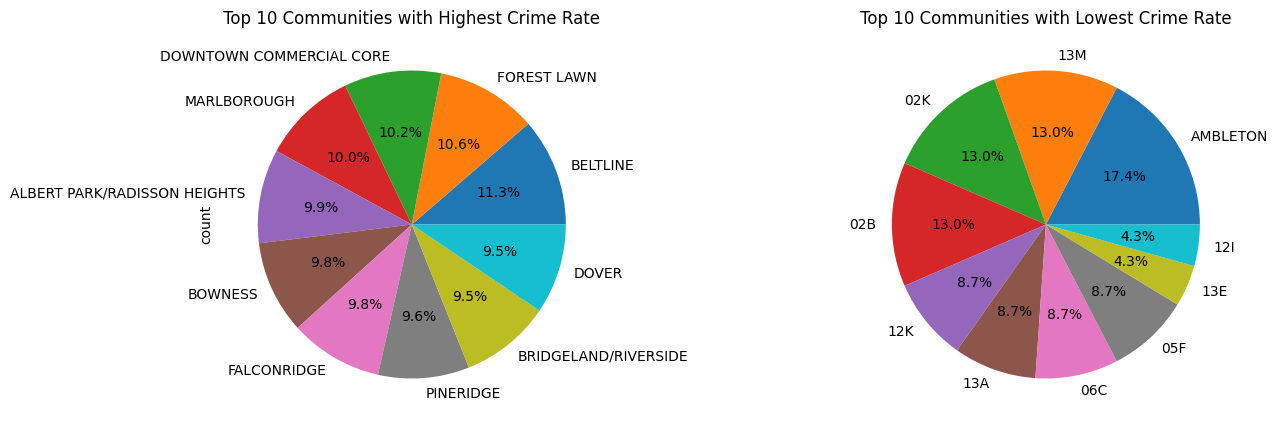

In [64]:
# below it creates a figure with 2 side-by-side plots, sized 15x5 inches, where `ax[0]` and `ax[1]` refer to each subplot.

fig, ax = plt.subplots(1, 2, figsize = (15,5))

#Top 10 Communities with Highest Crime Rate
high_crime_rate_community.plot.pie(autopct="%1.1f%%", ax = ax[0])
ax[0].set_title("Top 10 Communities with Highest Crime Rate")
ax[0].set_label("")

#Top 10 Communities with Lowest Crime Rate
low_crime_rate_community.plot.pie(autopct='%1.1f%%', ax = ax[1])
ax[1].set_title('Top 10 Communities with Lowest Crime Rate')
ax[1].set_ylabel('')


### Summary about Community Distribution
These pie charts show the distribution of crimes in each community. The first pie chart shows the top 10 most dangerous communities in Calgary. The second pie chart shows the distribution of top 10 safest communities in Calgary.

### **Left Pie Chart: Top 10 Communities with Highest Crime Rate**

* **Beltline** has the highest crime rate (11.3%), followed by **Forest Lawn (10.6%)** and **Downtown Commercial Core (10.2%)**.
* The other high-crime communities include **Marlborough, Albert Park/Radisson Heights, Bowness, Falconridge, Pineridge, Dover**, and **Bridgeland/Riverside**, all ranging between \~9.5% to \~10%.

### **Right Pie Chart: Top 10 Communities with Lowest Crime Rate**

* **Ambleton** has the lowest crime rate share (highest proportion among the lowest crime communities) at **17.4%**.
* **13M, 02K, and 02B** follow closely at **13%** each.
* The remaining low-crime communities include **12K, 13A, 06C, 05F, 13E**, and **12I**, with shares between **4.3% and 8.7%**.

### Overall Insight:

* Crime is more evenly distributed among high-crime communities, while a few communities dominate the low-crime category.
* The lowest crime rate areas have a steeper drop-off in crime presence beyond the top few communities.


## 2) Crime Category Distribution

In [68]:
crime_category = data["Category"].value_counts()
crime_category

Category
Theft FROM Vehicle                14411
Theft OF Vehicle                  11037
Break & Enter - Commercial         9189
Assault (Non-domestic)             8409
Violence Other (Non-domestic)      7119
Break & Enter - Dwelling           6402
Break & Enter - Other Premises     5743
Street Robbery                     2410
Commercial Robbery                 1629
Name: count, dtype: int64

Text(0, 0.5, '')

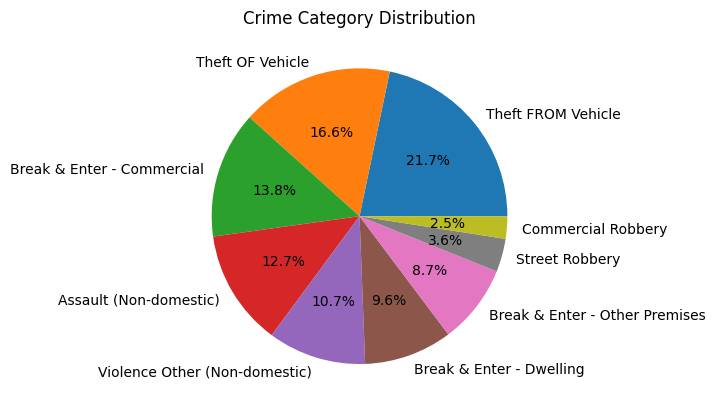

In [70]:
crime_category.plot.pie(autopct = "%1.1f%%")
plt.title("Crime Category Distribution")
plt.ylabel("")

Here is the summary of the **Crime Category Distribution** pie chart:

### 🔍 **Top Crime Categories by Percentage:**

1. **Theft FROM Vehicle** – 21.7% (📈 Highest crime category)
2. **Theft OF Vehicle** – 16.6%
3. **Break & Enter – Commercial** – 13.8%
4. **Assault (Non-domestic)** – 12.7%
5. **Violence Other (Non-domestic)** – 10.7%
6. **Break & Enter – Dwelling** – 9.6%
7. **Break & Enter – Other Premises** – 8.7%

### 🔻 **Less Frequent Crime Categories:**

* **Street Robbery** – 3.6%
* **Commercial Robbery** – 2.5% (📉 Lowest category)

### ✅ **Key Insights:**

* Vehicle-related thefts (**Theft FROM and OF Vehicles**) together make up **38.3%** of all crimes.
* Break & Enter crimes (all types combined) account for over **32%** of crimes, showing a significant concern across residential, commercial, and other premises.
* Violent crimes like **Assault** and **Other Non-domestic Violence** form a substantial part (\~23.4%) of the total.

This distribution highlights that **property-related crimes dominate** the overall crime landscape.


## 3) Crime Reportings Over the Years

In [74]:
crime_per_year = data.groupby('Year')['Crime Count'].sum().reset_index()
crime_per_year

,Year,Crime Count
0,2018,35339
1,2019,38158
2,2020,31786
3,2021,28391
4,2022,32732
5,2023,25222


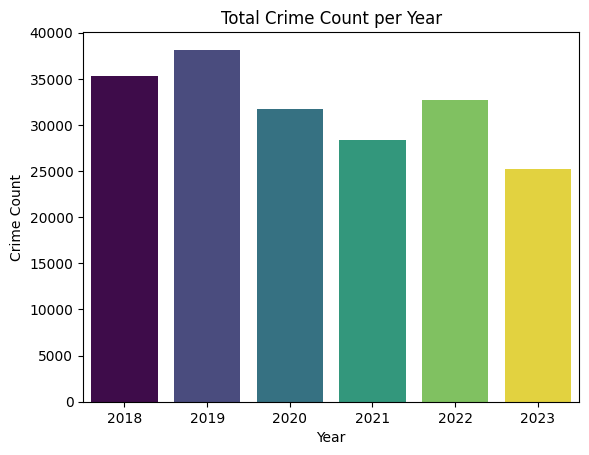

In [76]:
sns.barplot(x='Year', y='Crime Count', data=crime_per_year, hue='Year', palette='viridis', legend=False)
plt.title('Total Crime Count per Year')
plt.show()

Here's a concise summary of the **Total Crime Count per Year** based on your barplot and data:

---

### 📊 **Crime Statistics Summary (2018–2023)**

| Year | Crime Count |
| ---- | ----------- |
| 2018 | 35,339      |
| 2019 | 38,158      |
| 2020 | 31,786      |
| 2021 | 28,391      |
| 2022 | 32,732      |
| 2023 | 25,222      |

---

### 📌 **Key Insights:**

1. **Peak Year:**

   * **2019** recorded the **highest number of crimes**: **38,158**.

2. **Lowest Year:**

   * **2023** saw the **lowest crime count**: **25,222**, a **34% decrease** compared to 2019.

3. **Trend Overview:**

   * After a **rise** from 2018 to 2019, there was a **consistent decline** through 2021.
   * A **slight increase** occurred in 2022.
   * In 2023, the number of crimes **dropped again**, reaching the lowest in the 6-year period.

---

### 📈 Visual Insight (from the plot):

* The **bar colors** represent each year using the **'viridis' palette**, visually emphasizing the transition from high to low crime rates.



## 4) Crime Reportings by month

In [80]:
crime_per_month = data.groupby('Month')['Crime Count'].sum().reset_index()
crime_per_month

,Month,Crime Count
0,1,16417
1,2,14097
2,3,16048
3,4,15278
4,5,15867
5,6,16402
6,7,17742
7,8,18420
8,9,17461
9,10,16561


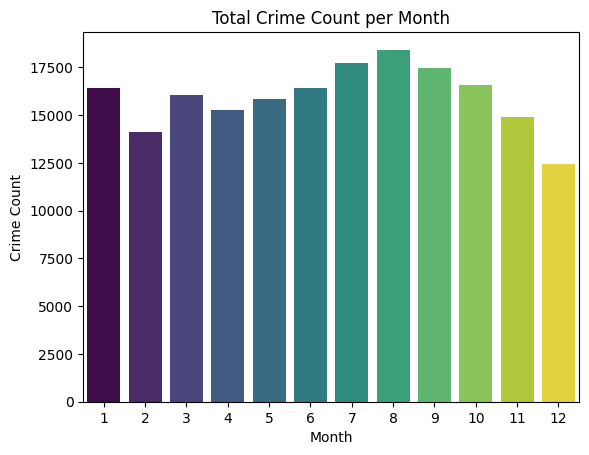

In [82]:
sns.barplot(x="Month", y="Crime Count", data= crime_per_month, hue="Month", palette='viridis', legend=False)
plt.title("Total Crime Count per Month")
plt.show()

Here's a concise summary of your **Total Crime Count per Month** from January to December:

---

### 📅 **Monthly Crime Statistics**

| Month | Crime Count               |
| ----- | ------------------------- |
| Jan   | 16,417                    |
| Feb   | 14,097                    |
| Mar   | 16,048                    |
| Apr   | 15,278                    |
| May   | 15,867                    |
| Jun   | 16,402                    |
| Jul   | 17,742                    |
| Aug   | **18,420** 🔺 *(Highest)* |
| Sep   | 17,461                    |
| Oct   | 16,561                    |
| Nov   | 14,907                    |
| Dec   | **12,428** 🔻 *(Lowest)*  |

---

### 📌 **Key Observations:**

1. **Highest Crime Month:**

   * **August** with **18,420 crimes**.
   * Likely due to seasonal, social, or festival-related factors.

2. **Lowest Crime Month:**

   * **December** with only **12,428 crimes**.
   * A **32% drop** from August.

3. **General Pattern:**

   * Crimes **rise steadily from February to August**.
   * A **gradual decline** starts from September onward.

---



## 5) Community and Category Analysis

Text(0.5, 1.0, 'Top 5 Most safest Community and Crime Category')

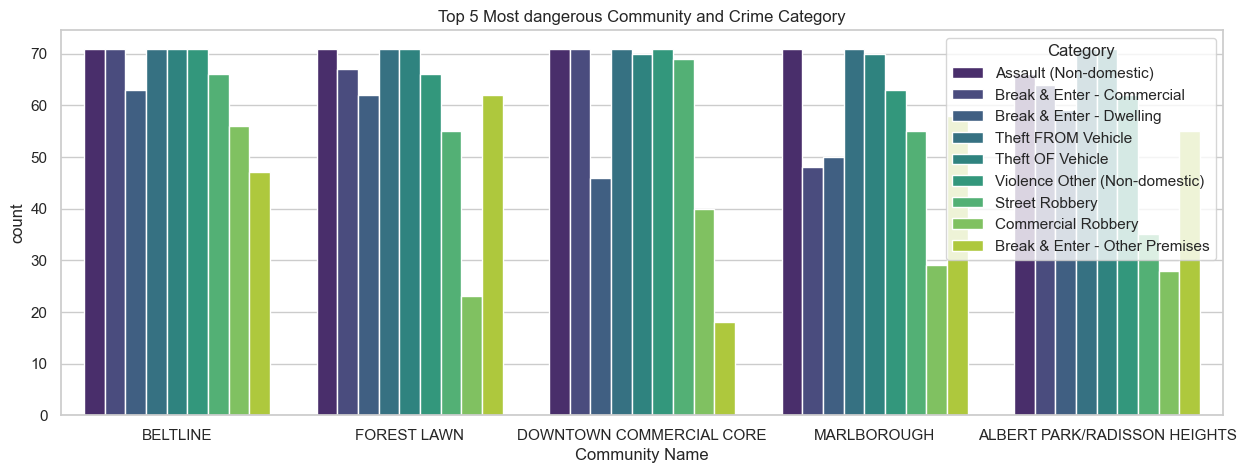

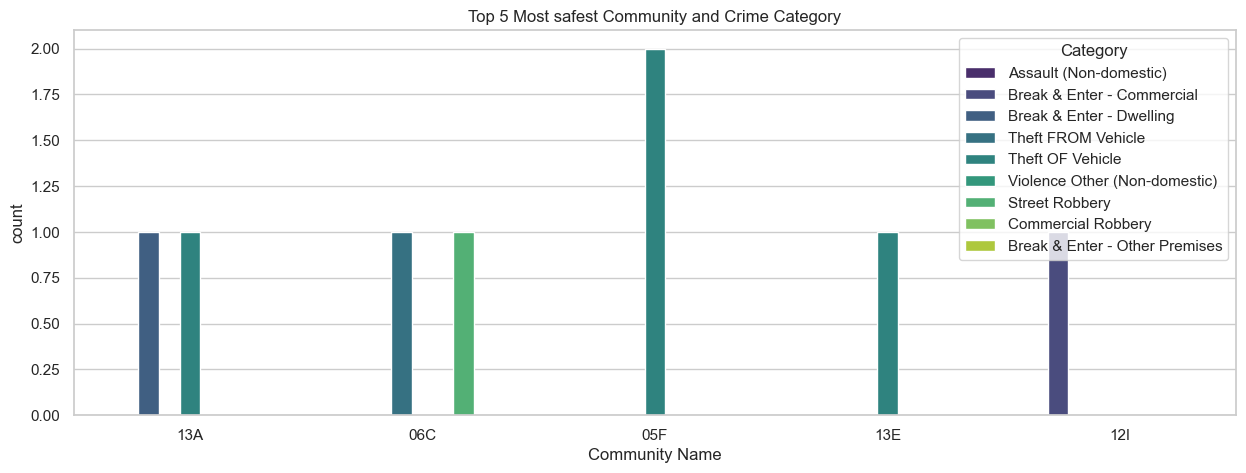

In [193]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Community Name', data = data, hue = 'Category', palette='viridis', order = data['Community Name'].value_counts().head(5).index).set_title('Top 5 Most dangerous Community and Crime Category')
sns.move_legend(plt.gca(), "upper right")
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Community Name', data = data, hue = 'Category', palette='viridis', order = data['Community Name'].value_counts().tail(5).index).set_title('Top 5 Most safest Community and Crime Category')

Here’s what these two charts tell us:

---

## 🔥 Top 5 Most Dangerous Communities

(Beltline, Forest Lawn, Downtown Commercial Core, Marlborough, Albert Park/Radisson Heights)

* **High Volume Across All Categories**
  Each of these neighborhoods sees **60–75 incidents** per category, meaning crime is both **frequent** and **diverse**.

* **Dominant Crime Types**

  * **Assault (Non‑domestic)**, **Theft OF Vehicle**, **Theft FROM Vehicle**, and **Street Robbery** all hover around **70 incidents**.
  * **Violence Other (Non‑domestic)** is also high (\~66–70).

* **Less Common, but Still Significant**

  * **Commercial Robbery** (\~55–66 incidents) and **Break & Enter – Other Premises** (\~45–62) trail the pack, but still occur dozens of times.

> **Insight:** These communities aren’t just seeing one or two crime spikes—they’re suffering **consistently high rates** across almost every major category.

---

## 🌳 Top 5 Safest Communities

(13A, 06C, 05F, 13E, 12I)

* **Very Low Totals (1–2 Incidents Each)**

  * **13A** and **06C** each have exactly **one** incident of **Break & Enter – Dwelling** and **Theft FROM Vehicle**, plus one **Commercial Robbery**.
  * **05F** has **two** incidents—both **Theft OF Vehicle**.
  * **13E** shows **one** **Theft FROM Vehicle**, and **12I** has **one** **Break & Enter – Commercial**.

* **Crime Is Sparse & Concentrated**
  In these areas, crime isn’t just lower in number—it’s also **narrowly focused**, typically only **one or two categories**.

> **Insight:** The “safest” neighborhoods see **almost no activity** except the occasional vehicle theft or single break‑in.

---

### 🔑 Takeaway

* **Danger Zones** face **high, multi‑category crime loads**—any intervention must be broad (policing, community programs, lighting, CCTV, etc.).
* **Safe Zones** experience **isolated incidents**, often vehicle‑related; targeted measures (e.g., neighborhood watch, secure parking) could be sufficient.


## 6) Year and Category Analysis

Text(0.5, 1.0, 'Crime Reportings by Year and Crime Category')

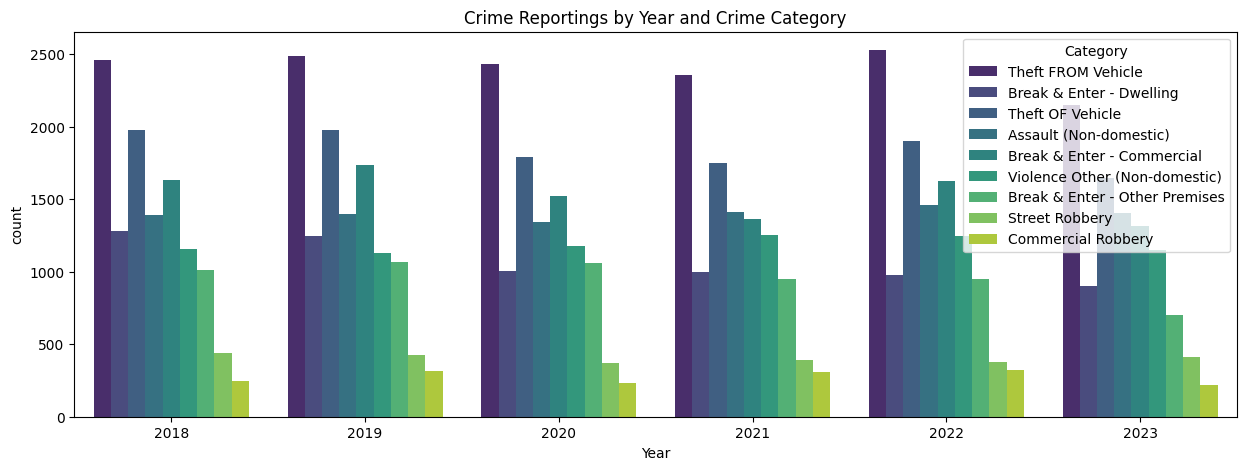

In [88]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Year', data = data, hue = 'Category', palette='viridis').set_title('Crime Reportings by Year and Crime Category')

Here's the **summary analysis** of the chart titled **"Crime Reportings by Year and Crime Category"**:

---

### 🔍 **Objective of the Chart**

The bar chart visualizes the **number of crime reportings** each year from **2018 to 2023**, categorized by various **crime types**. Each bar within a year corresponds to a specific **crime category**, using color-coded legend for clarity.

---

### 📊 **Key Observations**

#### 🔴 1. **Most Reported Crime:**

* **Theft FROM Vehicle** is consistently the **highest reported crime** across all years (2018–2023).

  * Peak around **2022**.
  * Minor dip in **2021**, possibly due to lockdowns or reduced public activity.

#### 🟣 2. **Next Most Frequent Crimes:**

* **Break & Enter - Dwelling** and **Theft OF Vehicle** consistently remain the second and third highest reported crimes.

  * These categories follow a **steady trend**, with slight fluctuations.

#### 🟢 3. **Moderate Crime Categories:**

* **Assault (Non-domestic)**, **Break & Enter - Commercial**, and **Violence Other (Non-domestic)** show similar mid-level reporting frequencies.

  * **2021** and **2022** show minor peaks in Assault-related categories.

#### 🟡 4. **Less Reported Crimes:**

* **Break & Enter - Other Premises**, **Street Robbery**, and **Commercial Robbery** are the **least frequent**.

  * These remain under **500–1000** incidents per year.
  * Steady and low — indicating either underreporting or genuinely less occurrence.

---

### 📉 **Trends Over Years**

| Year          | Key Trend                                                                        |
| ------------- | -------------------------------------------------------------------------------- |
| **2018–2019** | Most crimes increased slightly.                                                  |
| **2020**      | Noticeable **drop in all crime types** — possibly due to **COVID-19 lockdowns**. |
| **2021**      | Gradual recovery of crime activity, though still lower than pre-COVID.           |
| **2022**      | Crime rates **peak again**, almost back to 2019 levels.                          |
| **2023**      | Small decline seen in most categories compared to 2022.                          |

---

### 📌 **Conclusions**

* **Theft-related crimes** dominate the landscape (esp. vehicle-related).
* **COVID-19** clearly impacted crime rates in **2020–2021**, with a drop during those years.
* The chart helps law enforcement and policy makers **prioritize theft prevention**, especially from and of vehicles.
* **Street and commercial robbery**, while low, should still be monitored to prevent escalation.

---



## 7) Month and Category Analysis

Text(0.5, 1.0, 'Crime Reportings by Month and Crime Category')

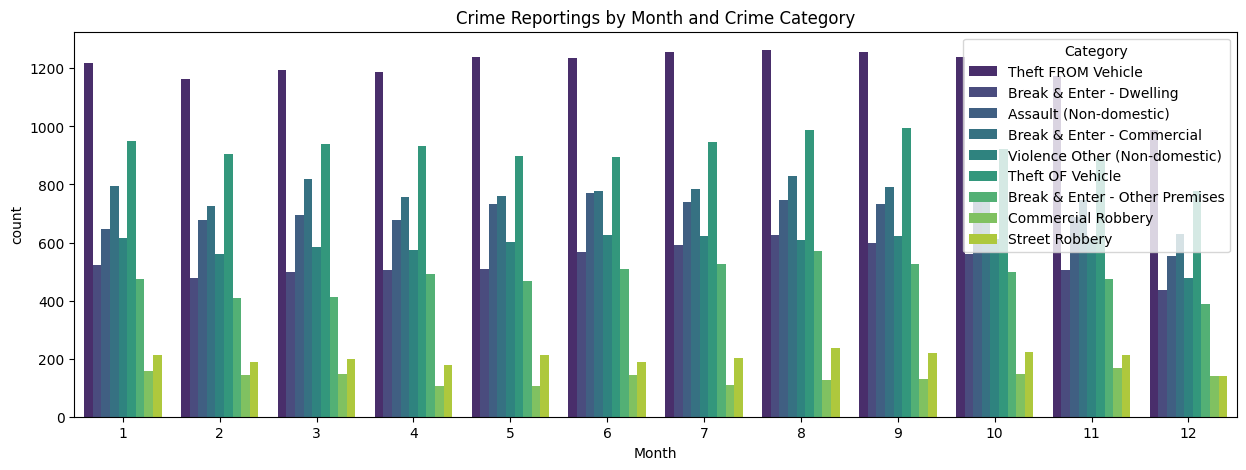

In [93]:
plt.figure(figsize=(15,5))
sns.countplot(x="Month", data=data, hue="Category", palette="viridis").set_title("Crime Reportings by Month and Crime Category")

Here's a **clear and professional summary** based on the bar chart titled **"Crime Reportings by Month and Crime Category"**:

---

### 📊 **Monthly Crime Category Analysis Summary**

This chart presents a breakdown of various crime categories reported across all 12 months. Each bar represents the count of incidents, categorized by type and colored accordingly.

#### 🔍 **Key Insights:**

1. **Most Reported Crime**:

   * **Theft FROM Vehicle** consistently leads across all months, peaking around **1,200+ reports monthly**.

2. **Top 3 Crime Categories**:

   * **Theft FROM Vehicle**
   * **Break & Enter - Dwelling**
   * **Assault (Non-domestic)**
     These three dominate overall, showing consistently high frequencies.

3. **Seasonal or Monthly Trends**:

   * Overall, **July to October** (Months 7–10) sees a slight increase in most crime categories.
   * **Street Robbery** and **Commercial Robbery** remain **comparatively low** across all months, with minimal fluctuations.

4. **Stable Trends**:

   * Most categories like **Violence Other (Non-domestic)**, **Break & Enter - Commercial**, and **Theft OF Vehicle** exhibit **relatively stable reporting patterns** across months.

5. **Least Reported Crimes**:

   * **Commercial Robbery** and **Street Robbery** are the **least frequent**, generally below **250 cases/month**.

#### 📌 **Conclusion:**

The analysis reveals that **property crimes**, particularly vehicle-related thefts and break-ins, are the most prevalent and steady throughout the year. There's **no drastic seasonality**, but mid-year months (especially **July–October**) tend to experience a **minor surge in crimes**.

---


## Data Preprocessing 2

In [109]:
from sklearn.preprocessing import LabelEncoder

#Label Encoding Object
le = LabelEncoder()

#Object type columns
object_type_columns = data.select_dtypes(include='object').columns
object_type_columns

Index(['Community Name', 'Category'], dtype='object')

In [111]:
#Label Encoding
for col in object_type_columns:
    data[col] = le.fit_transform(data[col])
data.head()

,Community Name,Category,Crime Count,Year,Month
0,0,0,1,2022,11
1,0,1,1,2019,6
2,0,1,1,2019,8
3,0,1,2,2020,3
4,0,1,2,2020,7


## Building a Nueral Network

In [116]:
# Prepare sequences for LSTM
def create_sequences(Data, seq_length):
    xs = []
    ys = []
    for i in range(len(Data) - seq_length):
        x = data.iloc[i:(i + seq_length)].to_numpy()
        y = data.iloc[i + seq_length]['Crime Count']
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [118]:
seq_length = 3
X, y = create_sequences(data, seq_length)

## Train Test Split

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Building and Training the LSTM Model

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [144]:
# Build the LSTM model

model = Sequential()

model.add(LSTM(units = 50 ,activation='relu', input_shape= (seq_length,X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

C:\Users\Public\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [146]:
# Complile the model

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss="mse")

In [148]:
# train the model

history = model.fit(X_train,y_train,epochs=100,validation_data=(X_val,y_val), batch_size=16)

Epoch 1/100
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - loss: 1446.7123 - val_loss: 8.1752
Epoch 2/100
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 44s 10ms/step - loss: 9.1358 - val_loss: 18.0710
Epoch 3/100
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - loss: 7.8933 - val_loss: 5.3993
Epoch 4/100
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - loss: 7.6100 - val_loss: 9.2108
Epoch 5/100
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - loss: 7.5251 - val_loss: 5.1074
Epoch 6/100
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - loss: 6.4587 - val_loss: 5.1902
Epoch 7/100
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - loss: 6.2682 - val_loss: 5.4074
Epoch 8/100
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - loss: 9.9322 - val_loss: 5.0508
Epoch 9/100
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - loss: 6.6516 - val_loss: 5.4042
Epoch 10/100
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - loss: 6.2189 - val_loss: 5.0358
Epoch 11/100
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - loss: 6.3556 - val_loss: 5.3345

## Plotting Loss Curve 

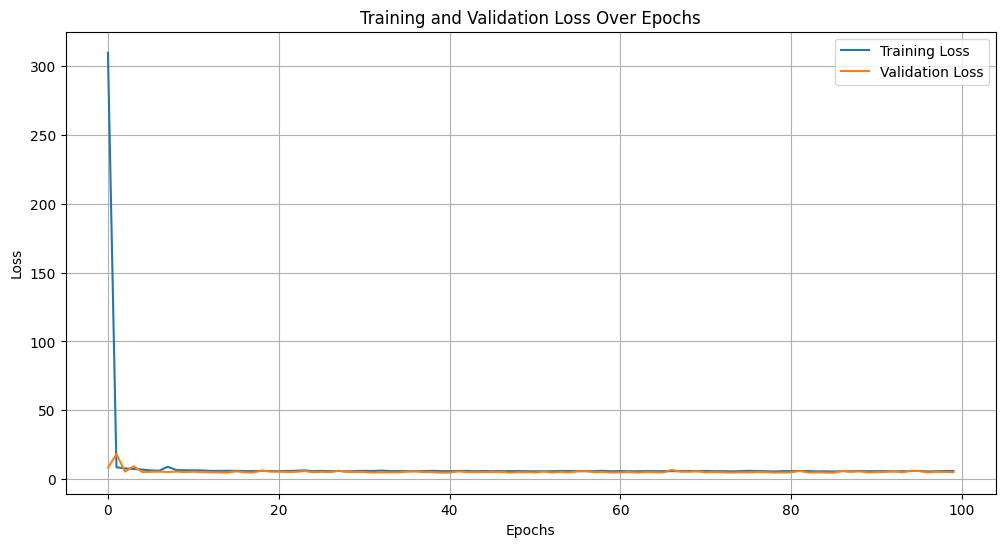

In [153]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [155]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Predictions
y_pred = model.predict(X_test)


print(f'Predictions: {y_pred.flatten()}')
print(f'True Values: {y_test.flatten()}')


311/311 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.4355
Test Loss: 4.902109622955322
311/311 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Predictions: [2.055468  1.8879617 1.8879617 ... 9.113789  2.1495821 2.1972938]
True Values: [2 1 1 ... 9 2 2]


## Model Evaluation

### Actual vs Predicted Values

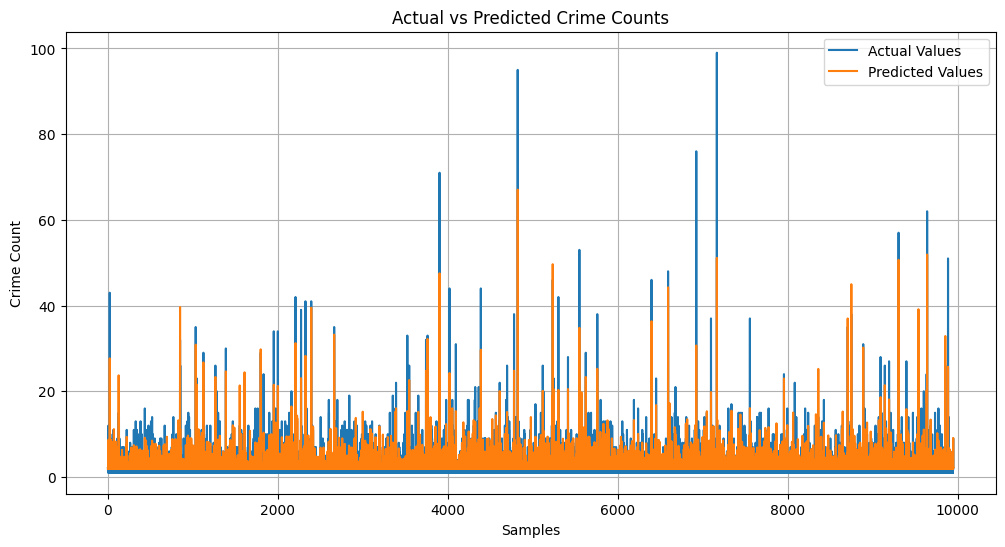

In [158]:
# Plotting Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('Actual vs Predicted Crime Counts')
plt.xlabel('Samples')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.show()

## Residual plot

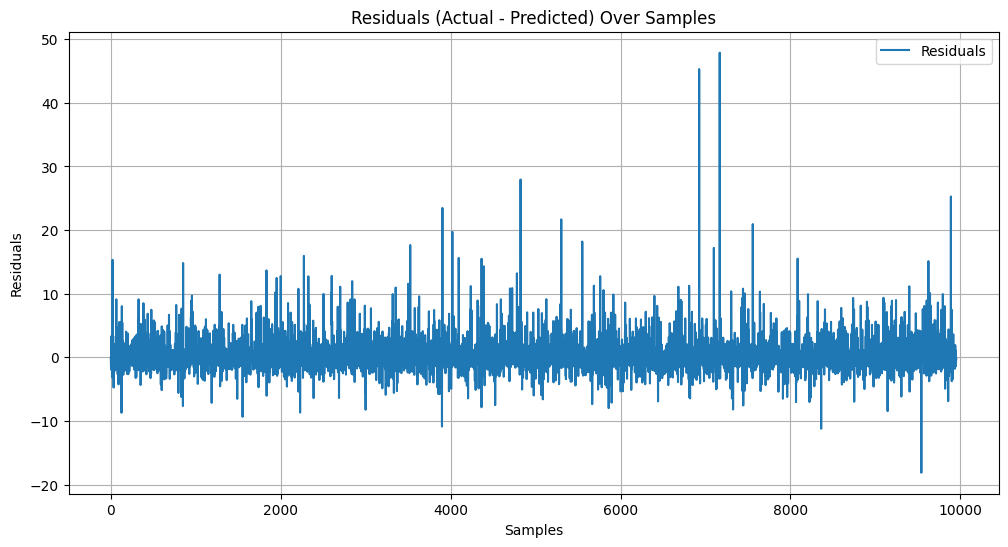

In [161]:
# Calculating residuals
residuals = y_test.flatten() - y_pred.flatten()

# Plotting residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals (Actual - Predicted) Over Samples')
plt.xlabel('Samples')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()
